In [1]:
! pip install imutils numpy matplotlib opencv-python pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
from matplotlib import pyplot as plt


## Loading Face Detector

In [3]:
facedetector_path = "../face_detection_model/"

In [4]:
proto_path = facedetector_path+"deploy.prototxt"
model_path = facedetector_path+"res10_300x300_ssd_iter_140000.caffemodel"

In [5]:
detector = cv2.dnn.readNetFromCaffe(proto_path, model_path)

## Load Face Embedding Model

In [6]:
embedding_model_path = facedetector_path+"openface_nn4.small2.v1.t7"

In [7]:
embedder = cv2.dnn.readNetFromTorch(embedding_model_path)

## Load Dataset Path

In [8]:
dataset_path = "../dataset/"

In [9]:
imagePaths = list(paths.list_images(dataset_path))

In [11]:
knownFaceDetection = []
knownEmbeddings = []
knownNames = []

In [12]:
total = 0

In [13]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = os.path.basename(os.path.dirname(imagePath))
	print(name, imagePath)

	# load the image, resize it to have a width of 600 pixels (while
	# maintaining the aspect ratio), and then grab the image
	# dimensions
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=600)
	(h, w) = image.shape[:2]

	# construct a blob from the image
	imageBlob = cv2.dnn.blobFromImage(
		cv2.resize(image, (300, 300)), 1.0, (300, 300),
		(104.0, 177.0, 123.0), swapRB=False, crop=False)

	# apply OpenCV's deep learning-based face detector to localize
	# faces in the input image
	detector.setInput(imageBlob)
	detections = detector.forward()

	# ensure at least one face was found
	if len(detections) > 0:
		# we're making the assumption that each image has only ONE
		# face, so find the bounding box with the largest probability
		i = np.argmax(detections[0, 0, :, 2])
		confidence = detections[0, 0, i, 2]

		# ensure that the detection with the largest probability also
		# means our minimum probability test (thus helping filter out
		# weak detections)
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the face
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# extract the face ROI and grab the ROI dimensions
			face = image[startY:endY, startX:endX]
			(fH, fW) = face.shape[:2]

			# ensure the face width and height are sufficiently large
			if fW < 20 or fH < 20:
				continue

			# construct a blob for the face ROI, then pass the blob
			# through our face embedding model to obtain the 128-d
			# quantification of the face
			faceBlob = cv2.dnn.blobFromImage(face, 1.0 / 255,
				(96, 96), (0, 0, 0), swapRB=True, crop=False)
			embedder.setInput(faceBlob)
			vec = embedder.forward()

			# add the name of the person + corresponding face
			# embedding to their respective lists
			knownNames.append(name)
			knownEmbeddings.append(vec.flatten())
			cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
			total += 1

[INFO] processing image 1/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-2km.jpg
[INFO] processing image 2/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-2ly.jpg
[INFO] processing image 3/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-33sh.jpg
[INFO] processing image 4/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-3tj.jpg
[INFO] processing image 5/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-4hm.jpg
[INFO] processing image 6/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-4r0.jpg
[INFO] processing image 7/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-56o.jpg
[INFO] processing image 8/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-5wfu.jpg
[INFO] processing image 9/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-5zdr.jpeg
[INFO] processi

[INFO] processing image 76/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-uz1.jpg
[INFO] processing image 77/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-v6z.jpg
[INFO] processing image 78/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-veig.jpeg
[INFO] processing image 79/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-vgl.jpg
[INFO] processing image 80/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-vhaj.jpg
[INFO] processing image 81/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-vl9.jpg
[INFO] processing image 82/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-wer.jpg
[INFO] processing image 83/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-wor.jpg
[INFO] processing image 84/196
Abdul Kalam ../dataset/Abdul Kalam\apjabdul-kalam-best-hd-photos-1080p-wsix.jpg
[INFO]

[INFO] processing image 179/196
Unknown ../dataset/Unknown\male_000043.jpg
[INFO] processing image 180/196
Unknown ../dataset/Unknown\male_000044.jpg
[INFO] processing image 181/196
Unknown ../dataset/Unknown\male_000046.jpg
[INFO] processing image 182/196
Unknown ../dataset/Unknown\male_000047.jpg
[INFO] processing image 183/196
Unknown ../dataset/Unknown\male_000049.jpg
[INFO] processing image 184/196
Unknown ../dataset/Unknown\male_000050.jpg
[INFO] processing image 185/196
Unknown ../dataset/Unknown\male_000063.jpg
[INFO] processing image 186/196
Unknown ../dataset/Unknown\male_000064.jpg
[INFO] processing image 187/196
Unknown ../dataset/Unknown\male_000065.jpg
[INFO] processing image 188/196
Unknown ../dataset/Unknown\male_000066.jpg
[INFO] processing image 189/196
Unknown ../dataset/Unknown\male_000067.jpg
[INFO] processing image 190/196
Unknown ../dataset/Unknown\male_000068.jpg
[INFO] processing image 191/196
Unknown ../dataset/Unknown\male_000070.jpg
[INFO] processing image 1

In [14]:
embeddings_path = "../output/embeddings.pickle"

In [15]:
# dump the facial embeddings + names to disk
print("[INFO] serializing {} encodings...".format(total))
data = {"embeddings": knownEmbeddings, "names": knownNames}
f = open(embeddings_path, "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing 193 encodings...


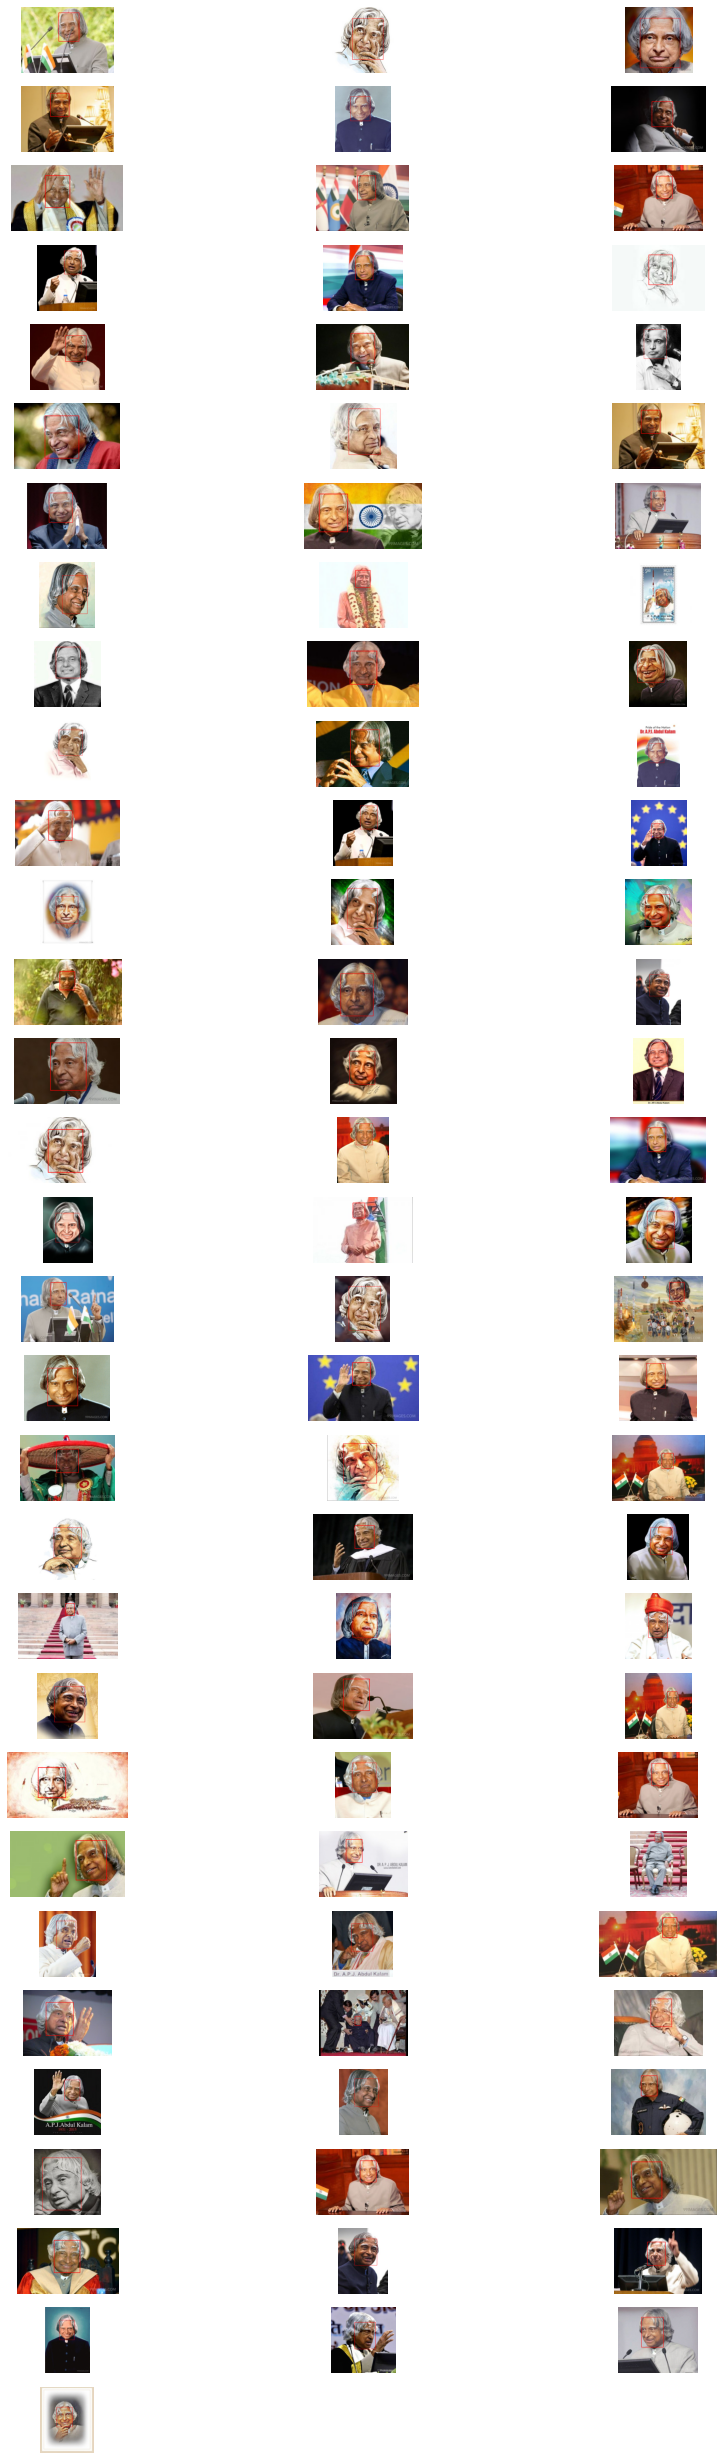

In [29]:
cols = 3
div, rem = divmod(len(knownFaceDetection), cols)
rows = div + 1 if rem!=0 else div
plt.figure(figsize=(15,45))
for i in range(len(knownFaceDetection)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(knownFaceDetection[i], cv2.COLOR_BGR2RGB) )
    plt.axis('off')
plt.show()